<!-- HTML file automatically generated from DocOnce source (https://github.com/doconce/doconce/)
doconce format html Firstmidterm2022.do.txt --no_mako -->
<!-- dom:TITLE: PHY321: Classical Mechanics 1 -->

### Part 1, Particle in a one-dimensional  potential

We consider a particle (for example an atom) of mass $m$ moving in a one-dimensional potential,

$$
V(x)=\frac{V_0}{d^4}\left(x^4-2x^2d^2+d^4\right).
$$

We will assume all other forces on the particle are small in comparison, and neglect them in our model.  The parameters $V_0$ and $d$ are known constants. 

1. (5pt) Plot the potential and find the  equilibrium points (stable and unstable) by requiring that the first derivative of the potential is zero. Make an energy diagram (see for example Malthe-Sørenssen chapter 11.3) and mark the equilibrium points on the diagram and characterize their stability. The position of the particle is $x$. 

2. (5pt) Choose two different energies that give two distinct types of motions, draw them into the energy diagram, and describe the motion in each case.

3. (5pt) If the particle  starts at rest at $x=2d$, what is the velocity of the particle at the point $x=d$?

4. (5pt) If the particle  starts at $x=d$ with velocity $v_0$, how large must $v_0$ be for the  particle to reach the point $x=−d$?

5. (5pt) Use the above potential to set up the total forces acting on the particle.  Find the acceleration acting on the particle. Is this a conservative force? Calculate also the **curl** of the force  $\boldsymbol{\nabla}\times \boldsymbol{F}$ in order to validate your conclusion. 

6. (5pt) Are linear momentum and angular momentum conserved? You need to show this by calculating the quantities.

7. (10pt) Write a numerical algorithm to find the position and velocity of the particle at a time $t+\Delta t$ given the position and velocity at a time $t$. Here you can use either the standard forward Euler, or the Euler-Cromer or the Velocity Verlet algorithms.   You need to justify your choice here (hint: consider energy conservation).

8. (10pt) Use now your program to find the position of the particle as function of time from $t=0$ to $t=30$ s using a mass  $m=1.0$ kg, the parameter $V_0=1$ J and $d=0.1$ m. Make a plot of three distinct positions with initial conditions $x_0=d$ and $v_0=0.5$ m/s, $x_0=d$ and $v_0=1.5$ m/s, and $x_0=d$ and $v_0=2.5$ m/s. Plot also the velocity.  Perform calculations with and without the term $x^4$ in the potential. Do you see a difference? 

9. (10pt) Describe the behavior of the particle for the three initial conditions  and sketch the motion in an energy diagram. Is energy conserved in your simulations?

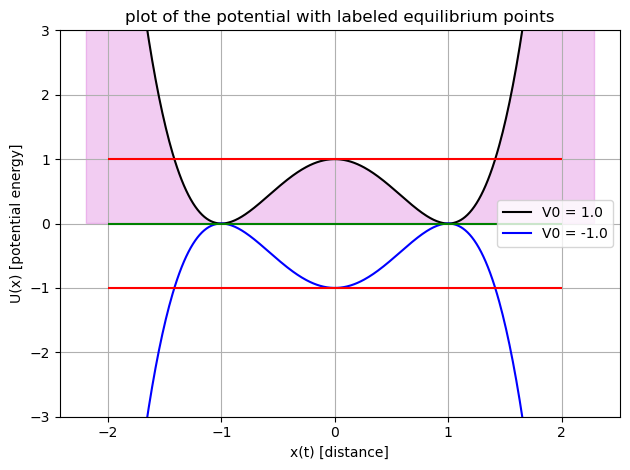

In [1]:
#part 1

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math

#defining the variables
v0_original = 1.0
v0_new = -1.0
d = 1.0
Deltax = 0.01
xn = 2.3
x0 = -2.2

#solving the potential energy equation
x = np.arange(x0,xn,Deltax)
n = np.size(x)
U = np.zeros(n)
U_original = (v0_original/d**4)*(x**4 -2*x**2*d**2+d**4)
U_new = (v0_new/d**4)*(x**4-2*x**2*d**2+d**4)

plt.plot(x, U_original, color = "black", label = "V0 = 1.0")
plt.plot(x, U_new, color = "blue", label = "V0 = -1.0")
plt.legend()
plt.xlabel("x(t) [distance]")
plt.ylabel("U(x) [potential energy]")
plt.title("plot of the potential with labeled equilibrium points")

#labeling the equilibrium points
plt.hlines(1,-2,2, color = 'red')
plt.hlines(0,-2,2, color = 'green')
plt.hlines(-1,-2,2, color = 'red')

#coloring the energy beneath the function
plt.fill_between(
        x= x, 
        y1= U_original, 
        where= (-2.2 < x)&(x < 2.3),
        color= "m",
        alpha= 0.2)

#formatting the plot
plt.ylim(-3, 3)
plt.tight_layout()
plt.grid()
plt.show()

<span style='color:Blue'> **Part 2**: On the energy diagram, there are two potential energies plotted. The black line shows the potential energy when the V0 constant is positive 1, and the blue line shows the potential energy when the V0 constant is negative 1. The blue line, being negative, would indicate a situation where the force acting on the particle is attractive and work must be done to overcome such.
    
<span style='color:Blue'>There are also two horizontal lines on the diagram. The red line describes the motion of the particle with maximum energy, thus it can overcome both of the potential wells. The green line, however, describes the motion of the particle with no energy at all, and it does not move or overcome the potential wells.
    
____________________________________________________________________________________________________________________

<span style='color:Blue'> **Part 3**: 
<span style='color:Blue'> The derivative of the potential equation with respect to $x$ is
<span style='color:Blue'>
$$
\frac{dV}{dx} = \frac{V_0}{d^4}\left(4x^3-4xd^2+d^4\right)
$$
    
<span style='color:Blue'> and since $d=1$, then we can solve the derivative of the potential function to find the minima and maxima:
    
<span style='color:Blue'>
$$
{V_0}\left(4x^3-4x\right) = 0
$$

<span style='color:Blue'> and the solutions are $x=-1,0,1$. Therefore, we know that the maximum kinetic energy takes place at $x=-1,1$, or $x=-d,d$. We can now derive the equation for the maximum potential energy for when $x=2d$:
    
<span style='color:Blue'> 
$$
V(x)_{max}=\frac{V_0}{d^4}\left(x^4-2x^2d^2+d^4\right)
$$
$$
V(x)_{max}=\frac{V_0}{(d)^4}\left((2d)^4-2(2d)^2d^2+d^4\right)
$$
$$
V(x)_{max}=\frac{V_0}{(d)^4}\left(9d^4\right)
$$
$$
V(x)_{max}=9{V_0}
$$
    
<span style='color:Blue'> and therefore, we can express the maximum kinetic energy in terms of the maximum potential energy: 
    
<span style='color:Blue'> 
$$
V(x)_{max} = K(x)_{max} = \frac{1}{2}mv^2 =9{V_0}
$$

<span style='color:Blue'> now finally solving for velocity:
    
<span style='color:Blue'> 
$$
v = \sqrt{\frac{18V_0}{m}}
$$  
    
____________________________________________________________________________________________________________________

<span style='color:Blue'> **Part 4**: We are given that $x=d=1$, and we know that according to the graph, this is the equivalent to saying $x=d=-1$. Now we can solve the potential equation for this value:
<span style='color:Blue'>
$$
V(x=d)=\frac{V_0}{d^4}\left(x^4-2x^2d^2+d^4\right)
$$
$$
V(x=d)=0
$$
<span style='color:Blue'> We have numerically confirmed that there is zero potential energy at $x=d=-d$, and therefore, this means that all the energy as these points is kinetic and can be described as such. We also know that when $x=0$, the potential enery is simply equal to $V_0$:
$$
V(x=0)=V_0
$$    
Therefore, the amount of velocity needed for the particle to go from zero potential energy to $V_0$ potential energy is found using the conservation of energy:
$$
E(x=d)=\frac{1}{2}mv_0^2 = V_0
$$   
$$
v_0 = \sqrt{\frac{2V_0}{m}}
$$ 
    
____________________________________________________________________________________________________________________

<span style='color:Blue'> **Part 5**: The total forces acting on the particle only exist in the x-direction since this is a one-dimensional equation. Due to this, we already know that the force is conserved without having to perform any calculations because you cannot have a curl of a force in only one direction. First, we will calculate the force, which is the partial derivative of the equation with respect to x.
<span style='color:Blue'>
$$
F_x = -\frac{\partial V}{\partial x} = -\frac{V_0}{d^4}\left(4x^3-4xd^2\right)
$$
<span style='color:Blue'> To further verify that this is a conservative force, we will calculate the curl of ${\nabla}\times{F}$. Since the equation is one-dimensional, the partial derivatives with respect to $y$ and $z$ are zero:
<span style='color:Blue'>
$$
F_y = \frac{\partial V}{\partial y} = 0 = F_z = \frac{\partial V}{\partial z}
$$    
Now we will calculate the curl of the force:
$$
({\nabla}\times{F})_x = \frac{\partial F_y}{\partial z} - \frac{\partial F_z}{\partial y} = 0
$$
$$
({\nabla}\times{F})_y = \frac{\partial F_x}{\partial z} - \frac{\partial F_z}{\partial x} = 0
$$  
$$
({\nabla}\times{F})_z = \frac{\partial F_y}{\partial x} - \frac{\partial F_x}{\partial y} = 0
$$
$$
\therefore ({\nabla}\times{F}) = 0
$$
    
<span style='color:Blue'> Now using Newton's Second Law, we know that $F=ma$, and therefore, $a=F/m$. So our acceleration can we expressed as:
$$
a_x = - \frac{V_0  (4x^3-4xd^2)}{md^4}
$$
    
____________________________________________________________________________________________________________________

<span style='color:Blue'> **Part 6**: The linear momentum is conserved only in the $y$ and $z$ direction since there are no external forces acting on the system in those directions. The linear momentum is not conserved in the $x$, however, and can be expressed as:
<span style='color:Blue'>
$$
P = mv
$$
$$
\frac{dP}{dt} = m\frac{dv}{dt}
$$
$$
\frac{dP}{dt} = ma = F_x = \frac{V_0}{d^4}\left(4x^3-4xd^2\right) \neq 0
$$
    
<span style='color:Blue'> The angular momentum is conserved in all directions since the potential is only expressed in one dimension.
$$
\hat{l} = \hat{r}\times \hat{P} = 0
$$
    
____________________________________________________________________________________________________________________

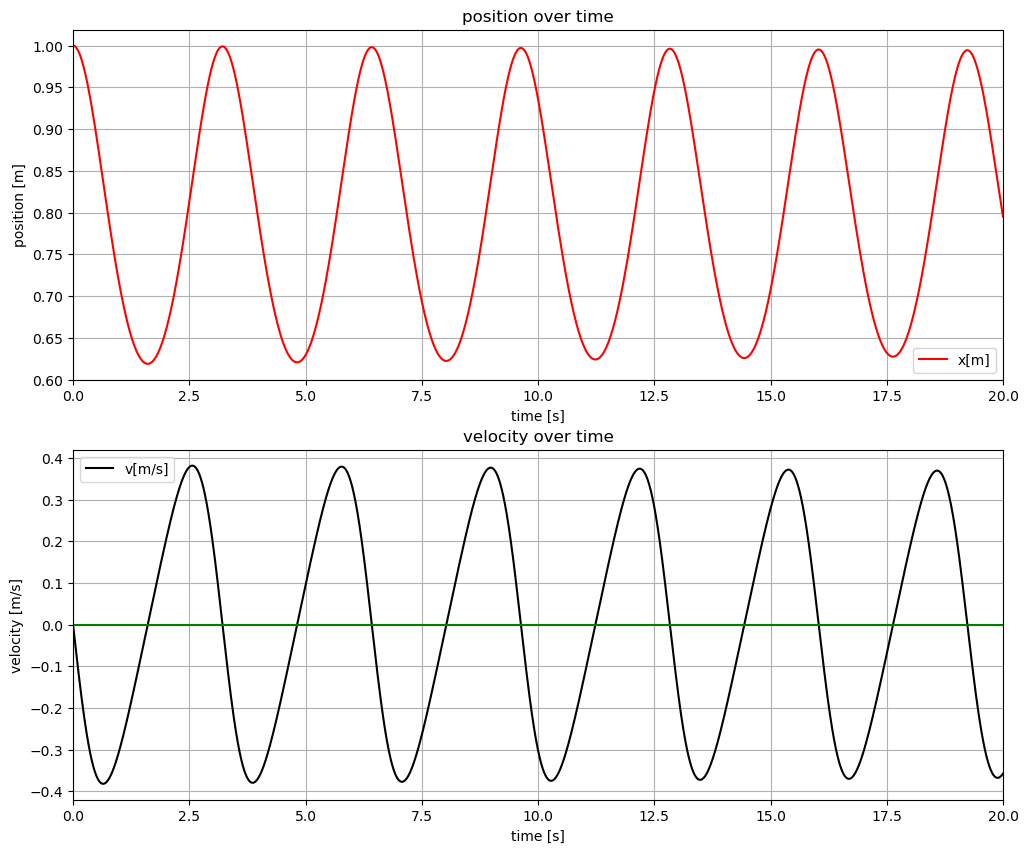

In [5]:
#Part 7
#Using the Euler-Cromer method in order to conserve energy of the system

#needed imports
import numpy as np
import pandas as pd
from math import *
import matplotlib.pyplot as plt

#initial conditions
DeltaT = 0.001
V0 = 1.0
d = 1.0
m = 1.0
x0 =  1.0 
v0 = 0.0

#setting up arrays 
tf = 20
n = int(np.ceil(tf/DeltaT))
t = np.zeros(n)
v = np.zeros(n)
x = np.zeros(n)
x[0] = x0
v[0] = v0

#integrating using Euler-Cromer's method
for i in range(n-1):
    a = -(V0*(4*x[i]**3 - 4*x[i]*d**2 + d**4))/(m*d**4)
    
    #updating velocity, time and position arrays
    v[i+1] = v[i] + DeltaT*a
    x[i+1] = x[i] + DeltaT*(v[i+1]) + DeltaT*DeltaT*a
    t[i+1] = t[i] + DeltaT
    
#plotting position as function of time    
plt.figure(figsize=(12,10))
plt.subplot(2,1,1)
plt.plot(t, x, color = "red", label = 'x[m]')
plt.xlim([0,tf])
plt.title('position over time')
plt.xlabel('time [s]')
plt.ylabel('position [m]')
plt.grid()
plt.legend()

#plotting velocity as function of time    
plt.subplot(2,1,2)
plt.plot(t, v, color = 'black', label = 'v[m/s]')
plt.xlim([0,tf])
plt.title('velocity over time')
plt.xlabel('time [s]')
plt.ylabel('velocity [m/s]')
plt.hlines(0,0,20, color = 'green')
plt.grid()
plt.legend()

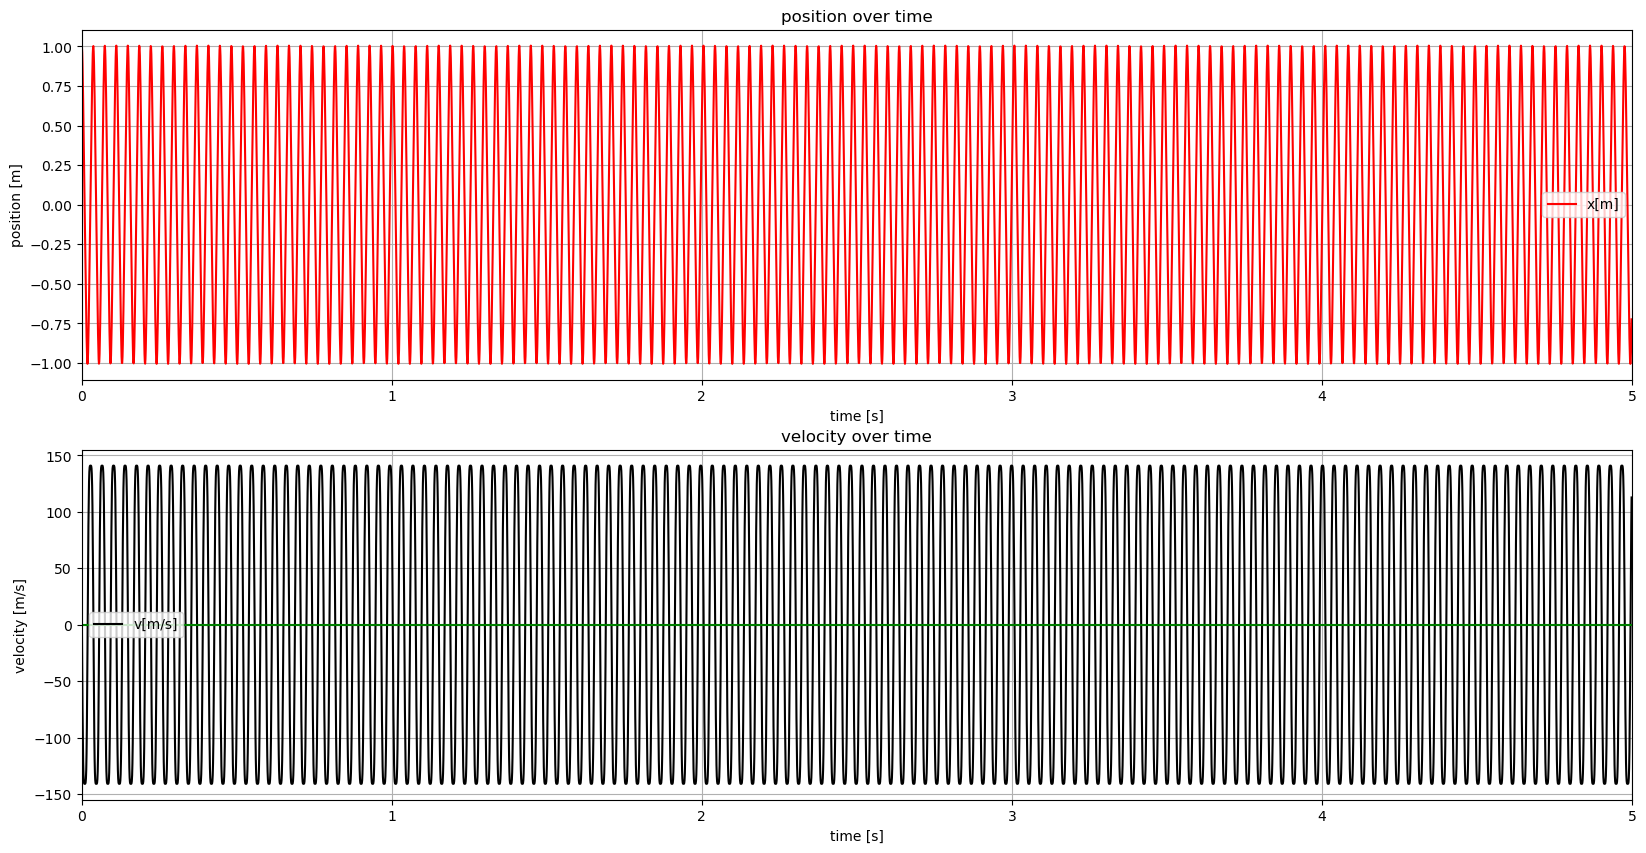

In [3]:
#Part 8, finding position as a function of time

#needed imports
import numpy as np
import pandas as pd
from math import *
import matplotlib.pyplot as plt

#initial conditions
DeltaT = 0.001
V0 = 1.0
d = 0.1  #changed parameter 
m = 1.0
x0 =  1.0 
v0 = 0.0

#setting up arrays 
tf = 5 #so you can see the oscillations
n = int(np.ceil(tf/DeltaT))
t = np.zeros(n)
v = np.zeros(n)
x = np.zeros(n)
x[0] = x0
v[0] = v0

#integrating using Euler-Cromer's method
for i in range(n-1):
    a = -(V0*(4*x[i]**3 - 4*x[i]*d**2 + d**4))/(m*d**4)
    
    #updating velocity, time and position arrays
    v[i+1] = v[i] + DeltaT*a
    x[i+1] = x[i] + DeltaT*(v[i+1])
    t[i+1] = t[i] + DeltaT
    
#print("the position of the particle with the given parameters is ", x[-1], 'm')

#plotting position as function of time    
plt.figure(figsize=(20,10))
plt.subplot(2,1,1)
plt.plot(t, x, color = "red", label = 'x[m]')
plt.xlim([0,tf])
plt.title('position over time')
plt.xlabel('time [s]')
plt.ylabel('position [m]')
plt.grid()
plt.legend()

#plotting velocity as function of time    
plt.subplot(2,1,2)
plt.plot(t, v, color = 'black', label = 'v[m/s]')
plt.xlim([0,tf])
plt.title('velocity over time')
plt.xlabel('time [s]')
plt.ylabel('velocity [m/s]')
plt.hlines(0,0,20, color = 'green')
plt.grid()
plt.legend()

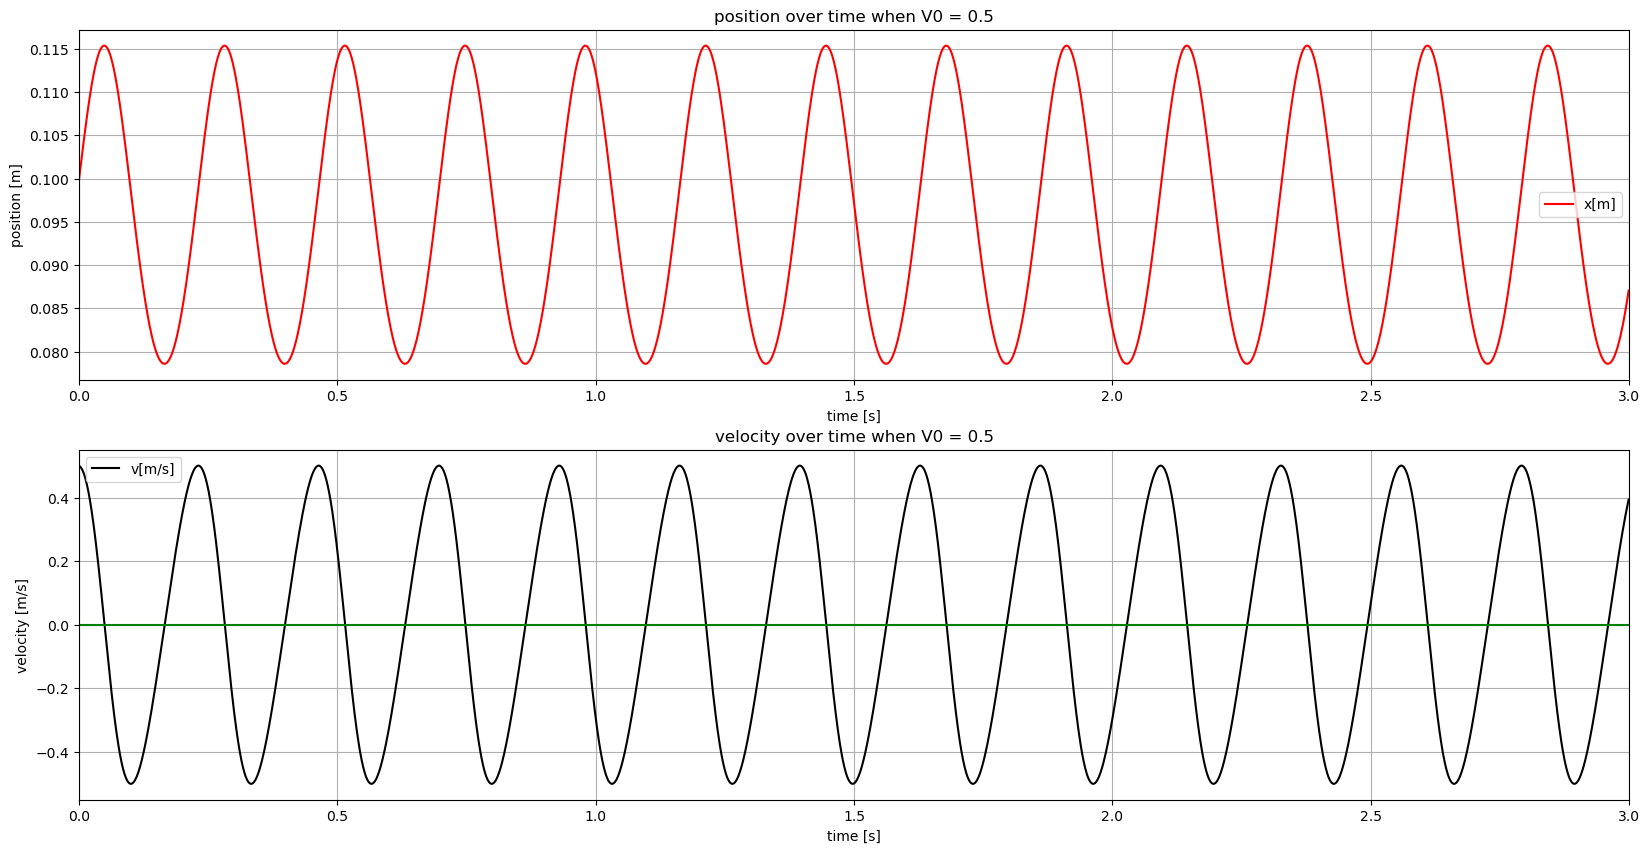

In [4]:
#Part 8, plotting the three distinct positions

#needed imports
import numpy as np
import pandas as pd
from math import *
import matplotlib.pyplot as plt

#initial conditions
DeltaT = 0.001
V0 = 1.0
d = 0.1  #changed parameter 
m = 1.0
x0 =  d 
v0_1 = 0.5

#setting up arrays 
tf = 3 #so you can see the oscillations
n = int(np.ceil(tf/DeltaT))
t = np.zeros(n)
v = np.zeros(n)
x = np.zeros(n)
x[0] = x0
v[0] = v0_1

#integrating using Euler-Cromer's method
for i in range(n-1):
    a = -(V0*(4*x[i]**3 - 4*x[i]*d**2 + d**4))/(m*d**4)
    
    #updating velocity, time and position arrays
    v[i+1] = v[i] + DeltaT*a
    x[i+1] = x[i] + DeltaT*(v[i+1])
    t[i+1] = t[i] + DeltaT
    
#print("the position of the particle with the given parameters is ", x[-1], 'm')

#plotting position as function of time    
plt.figure(figsize=(20,10))
plt.subplot(2,1,1)
plt.plot(t, x, color = "red", label = 'x[m]')
plt.xlim([0,tf])
plt.title('position over time when V0 = 0.5')
plt.xlabel('time [s]')
plt.ylabel('position [m]')
plt.grid()
plt.legend()

#plotting velocity as function of time    
plt.subplot(2,1,2)
plt.plot(t, v, color = 'black', label = 'v[m/s]')
plt.xlim([0,tf])
plt.title('velocity over time when V0 = 0.5')
plt.xlabel('time [s]')
plt.ylabel('velocity [m/s]')
plt.hlines(0,0,20, color = 'green')
plt.grid()
plt.legend()


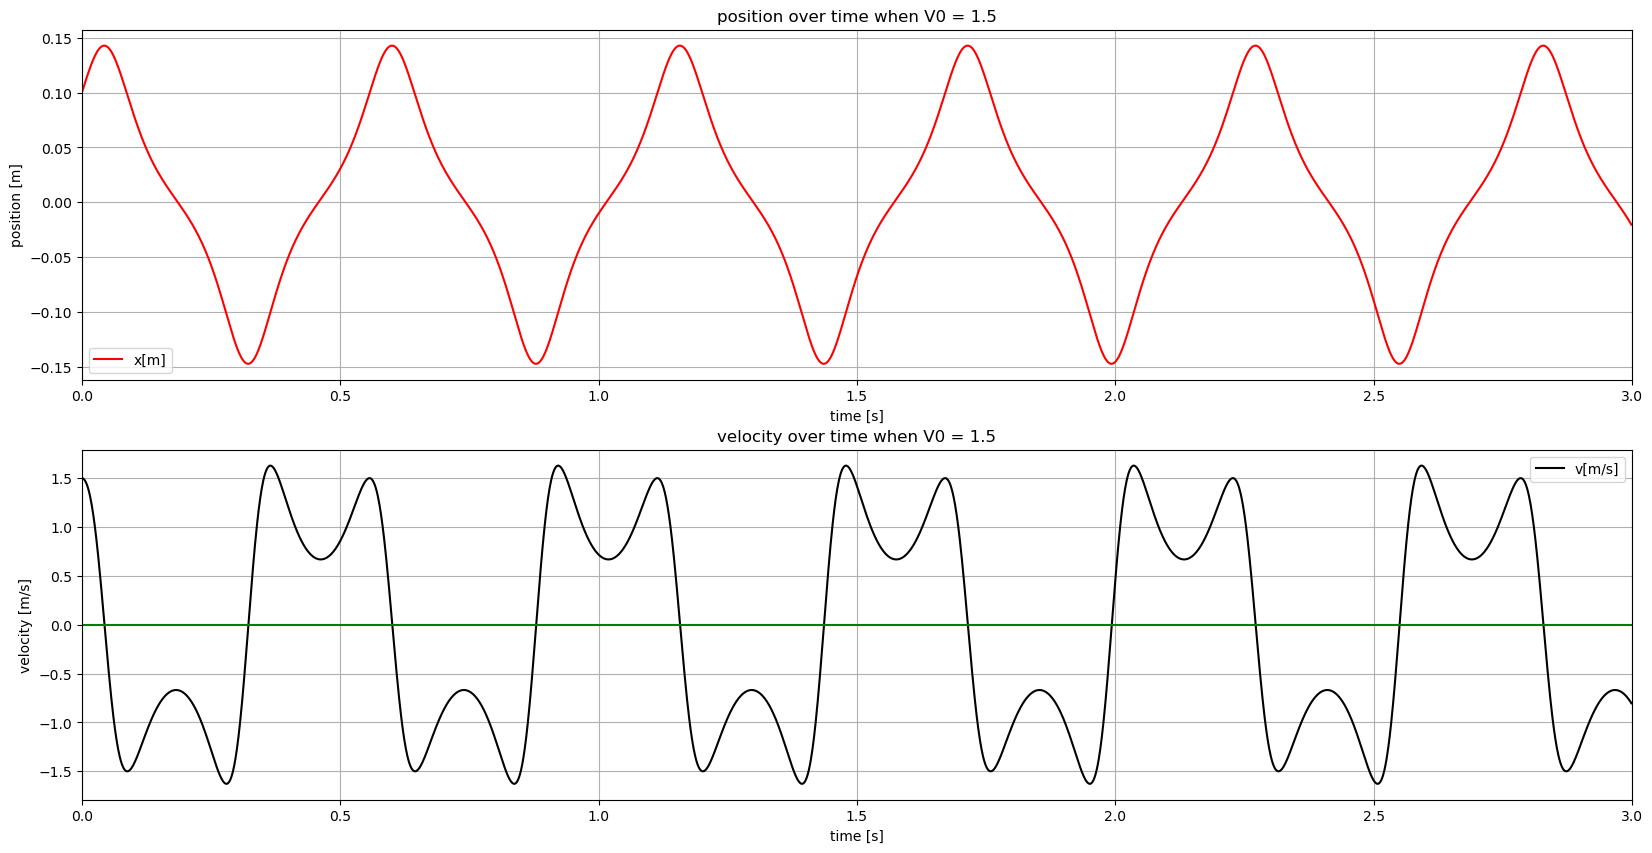

In [5]:
#needed imports
import numpy as np
import pandas as pd
from math import *
import matplotlib.pyplot as plt

#initial conditions
DeltaT = 0.001
V0 = 1.0
d = 0.1  #changed parameter 
m = 1.0
x0 =  d
v0_2 = 1.5

#setting up arrays 
tf = 3 #so you can see the oscillations
n = int(np.ceil(tf/DeltaT))
t = np.zeros(n)
v = np.zeros(n)
x = np.zeros(n)
x[0] = x0
v[0] = v0_2

#integrating using Euler-Cromer's method
for i in range(n-1):
    a = -(V0*(4*x[i]**3 - 4*x[i]*d**2 + d**4))/(m*d**4)
    
    #updating velocity, time and position arrays
    v[i+1] = v[i] + DeltaT*a
    x[i+1] = x[i] + DeltaT*(v[i+1])
    t[i+1] = t[i] + DeltaT
    
#print("the position of the particle with the given parameters is ", x[-1], 'm')

#plotting position as function of time    
plt.figure(figsize=(20,10))
plt.subplot(2,1,1)
plt.plot(t, x, color = "red", label = 'x[m]')
plt.xlim([0,tf])
plt.title('position over time when V0 = 1.5')
plt.xlabel('time [s]')
plt.ylabel('position [m]')
plt.grid()
plt.legend()

#plotting velocity as function of time    
plt.subplot(2,1,2)
plt.plot(t, v, color = 'black', label = 'v[m/s]')
plt.xlim([0,tf])
plt.title('velocity over time when V0 = 1.5')
plt.xlabel('time [s]')
plt.ylabel('velocity [m/s]')
plt.hlines(0,0,20, color = 'green')
plt.grid()
plt.legend()

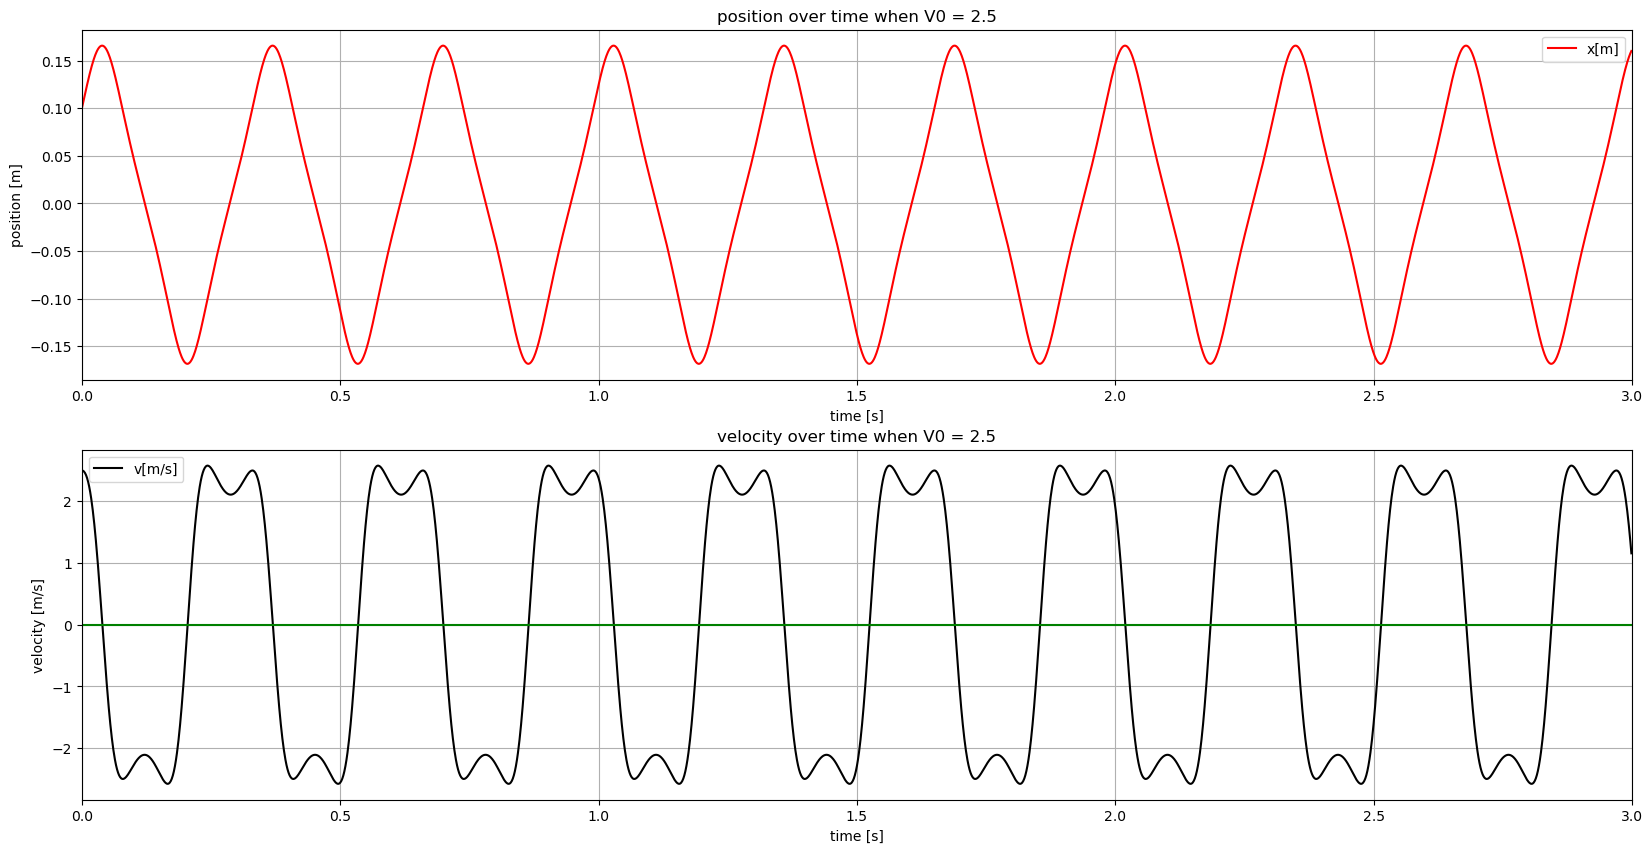

In [6]:
#needed imports
import numpy as np
import pandas as pd
from math import *
import matplotlib.pyplot as plt

#initial conditions
DeltaT = 0.001
V0 = 1.0
d = 0.1  #changed parameter 
m = 1.0
x0 =  d 
v0_2 = 2.5

#setting up arrays 
tf = 3 #so you can see the oscillations
n = int(np.ceil(tf/DeltaT))
t = np.zeros(n)
v = np.zeros(n)
x = np.zeros(n)
x[0] = x0
v[0] = v0_2

#integrating using Euler-Cromer's method
for i in range(n-1):
    a = -(V0*(4*x[i]**3 - 4*x[i]*d**2 + d**4))/(m*d**4)
    
    #updating velocity, time and position arrays
    v[i+1] = v[i] + DeltaT*a
    x[i+1] = x[i] + DeltaT*(v[i+1])
    t[i+1] = t[i] + DeltaT
    

#plotting position as function of time    
plt.figure(figsize=(20,10))
plt.subplot(2,1,1)
plt.plot(t, x, color = "red", label = 'x[m]')
plt.xlim([0,tf])
plt.title('position over time when V0 = 2.5')
plt.xlabel('time [s]')
plt.ylabel('position [m]')
plt.grid()
plt.legend()

#plotting velocity as function of time    
plt.subplot(2,1,2)
plt.plot(t, v, color = 'black', label = 'v[m/s]')
plt.xlim([0,tf])
plt.title('velocity over time when V0 = 2.5')
plt.xlabel('time [s]')
plt.ylabel('velocity [m/s]')
plt.hlines(0,0,20, color = 'green')
plt.grid()
plt.legend()

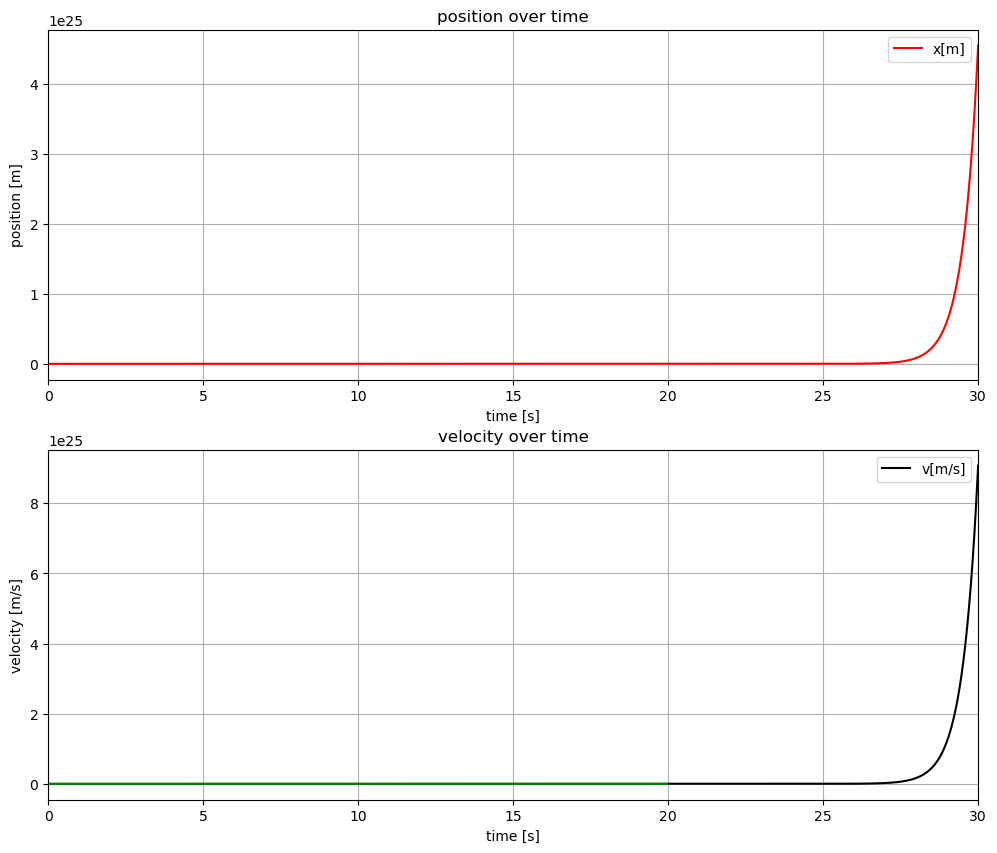

In [11]:
#Part 8
#without the x^4 term in the potential

#needed imports
import numpy as np
import pandas as pd
from math import *
import matplotlib.pyplot as plt

#initial conditions
DeltaT = 0.001
V0 = 1.0
d = 1.0
m = 1.0
x0 =  1.0 
v0 = 0.0

#setting up arrays 
tf = 30
n = int(np.ceil(tf/DeltaT))
t = np.zeros(n)
v = np.zeros(n)
x = np.zeros(n)
x[0] = x0
v[0] = v0

#integrating using Euler-Cromer's method
for i in range(n-1):
    a = -(V0*(- 4*x[i]*d**2 + d**4))/(m*d**4)
    
    #updating velocity, time and position arrays
    v[i+1] = v[i] + DeltaT*a
    x[i+1] = x[i] + DeltaT*(v[i+1]) + DeltaT*DeltaT*a
    t[i+1] = t[i] + DeltaT
    
#plotting position as function of time    
plt.figure(figsize=(12,10))
plt.subplot(2,1,1)
plt.plot(t, x, color = "red", label = 'x[m]')
plt.xlim([0,tf])
plt.title('position over time')
plt.xlabel('time [s]')
plt.ylabel('position [m]')
plt.grid()
plt.legend()

#plotting velocity as function of time    
plt.subplot(2,1,2)
plt.plot(t, v, color = 'black', label = 'v[m/s]')
plt.xlim([0,tf])
plt.title('velocity over time')
plt.xlabel('time [s]')
plt.ylabel('velocity [m/s]')
plt.hlines(0,0,20, color = 'green')
plt.grid()
plt.legend()


<span style='color:Blue'> **Part 8**: There is a difference when you exclude the $x^4$ term from the potential, specifically because there would only be one solution to the potential. And therefore, the particle rapidly accelerates and escapes the system within roughly 27 seconds.
    
____________________________________________________________________________________________________________________

<span style='color:Blue'> **Part 9**: The particle is rapidly oscillating between its two positions with the three different initial conditions. When the initial velocity is increased, there is random yet repeated motion at each kinetic energy maximum. See below the plot for the total energy diagram for the system.
____________________________________________________________________________________________________________________

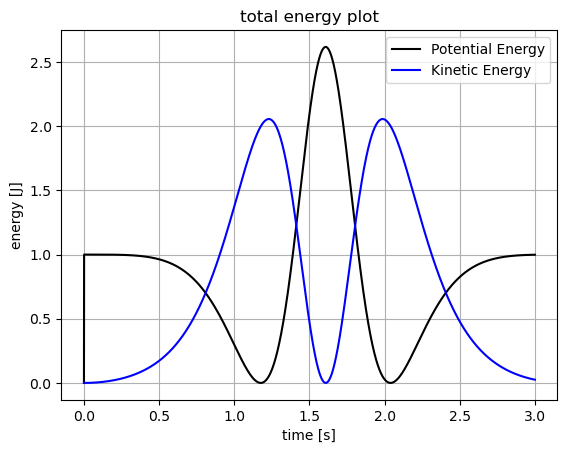

In [36]:
#Part 9, energy diagram

#initial conditions
DeltaT = 0.001
V0 = 1.0
d = 1.0
m = 1.0
x0 = 0
v0 = 0.0

#setting up arrays 
tf = 3 #so you can see the oscillations
n = int(np.ceil(tf/DeltaT))
t = np.zeros(n)
v = np.zeros(n)
x = np.zeros(n)
U = np.zeros(n)
K = np.zeros(n)
x[0] = x0
v[0] = v0

#integrating using Euler-Cromer's method
for i in range(n-1):
    a = -(V0*(4*x[i]**3 - 4*x[i]*d**2 + d**4))/(m*d**4)
    
    #updating velocity, time and position arrays
    v[i+1] = v[i] + DeltaT*a
    x[i+1] = x[i] + DeltaT*(v[i+1])
    t[i+1] = t[i] + DeltaT
    
    U[i+1] = (V0/d**4)*(x[i+1]**4 -2*x[i+1]**2*d**2+d**4)
    K[i+1] = (1/2)*m*(v[i+1])*(v[i+1])
    
plt.plot(t, U, color = "black", label = "Potential Energy")
plt.plot(t, K, color = "blue", label = "Kinetic Energy")
plt.title('total energy plot')
plt.xlabel('time [s]')
plt.ylabel('energy [J]')
plt.legend()
plt.grid()

<span style='color:Blue'> **Part 9**: According to the total energy plot above, we have shown that the energy is conserved numerically.

### Part 2, a potential with confinement

In the final part we are going to study a new potential. This potential contains the basic mathematical components needed to describe the confinement of quarks through a term $\kappa x$. The aim of this exercise is to try to develop your intuition about the motion of physical objects due to specific forces. Then we will test our intution by running simulations. The potential, in one dimension only is defined for $x\in [0.2,\infty)$.  It reads

$$
V(x) = -\frac{\gamma}{x}+\frac{\delta}{x^2}+\kappa x,
$$

where the last term is the one which ensures confinement of for example quarks.

1. (5pt) Plot the potential for $x\in [0.2,10]$ and set $\gamma=10$, $\delta = 3$ and $\kappa =1$. Find the value of $x$ where the potential has a minimum.

2. (5pt) Show that this potential leads to an energy conserving force by calculating the **curl** of the resulting force.

3. (10pt) Assume now that at $x=2$ the particle moving in this potential is at rest, that is its velocity is zero. Find the total energy and describe what kind of motion you can expect. The point $x=2$ is a so-called turning point. Can you find the other turning point where the kinetic energy is zero. If you keep increasing $x$, will the particle ever be able to escape the potential well?

4. (20pt) Finally we will now change our program (using either the Euler-Cromer or the Velocity-Verlet method) and compute the position and the velocity as functions of time using the force computed from the above potential. Use as initial condition at time $t=0$ that the particle is $x_0=2$ and has initial velocity $v_0=0$. Test numerically that energy is conserved as function of time. And test that the particle moves according to your analysis from the previous exercise.

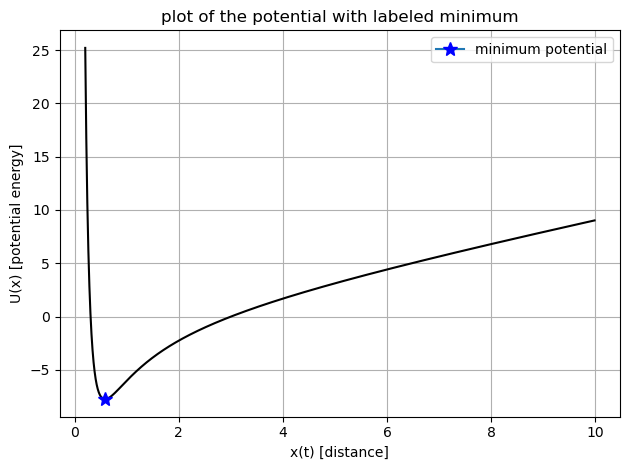

In [22]:
#part 1

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math

#defining the variables
gamma = 10
delta = 3
k = 1
Deltax = 0.01
xn = 10.0
x0 = 0.2

#solving the potential energy equation
x = np.arange(x0,xn,Deltax)
n = np.size(x)
U = np.zeros(n)
U = (-gamma/x) + (delta/x**2) + k*x

plt.plot(x, U, color = "black")
plt.xlabel("x(t) [distance]")
plt.ylabel("U(x) [potential energy]")
plt.title("plot of the potential with labeled minimum")

#labeling the minimum potential point
x_min_point = [0.58]
y_min_point = [-7.743]
plt.plot(x_min_point, y_min_point, marker="*", markersize=10, markeredgecolor="blue", markerfacecolor="blue", label = "minimum potential")

#formatting the plot
plt.legend()
plt.tight_layout()
plt.grid()

<span style='color:Blue'> **Part 1 Continued**: The potential has a minimum at x=0.58m.
    
____________________________________________________________________________________________________________________

<span style='color:Blue'> **Part 2**: The total forces acting on the particle only exist in the x-direction since this is a one-dimensional equation. Due to this, we already know that the force is conserved without having to perform any calculations because you cannot have a curl of a force in only one direction. First, we will calculate the force, which is the partial derivative of the equation with respect to x.
<span style='color:Blue'>
$$
F_x = \frac{\partial V}{\partial x} = -\frac{\gamma}{x^2}-\frac{2 \delta}{x^3}+\kappa,
$$
<span style='color:Blue'> To further verify that this is a conservative force, we will calculate the curl of ${\nabla}\times{F}$. Since the equation is one-dimensional, the partial derivatives with respect to $y$ and $z$ are zero:
<span style='color:Blue'>
$$
F_y = \frac{\partial V}{\partial y} = 0 = F_z = \frac{\partial V}{\partial z}
$$    
Now we will calculate the curl of the force:
$$
({\nabla}\times{F})_x = \frac{\partial F_y}{\partial z} - \frac{\partial F_z}{\partial y} = 0
$$
$$
({\nabla}\times{F})_y = \frac{\partial F_x}{\partial z} - \frac{\partial F_z}{\partial x} = 0
$$  
$$
({\nabla}\times{F})_z = \frac{\partial F_y}{\partial x} - \frac{\partial F_x}{\partial y} = 0
$$
$$
\therefore ({\nabla}\times{F}) = 0
$$

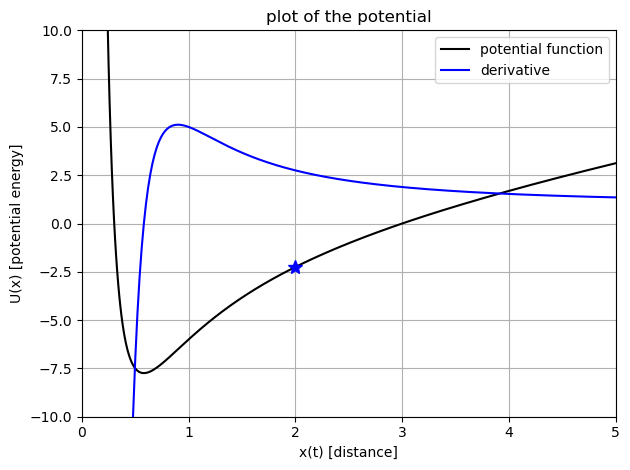

In [23]:
# Part 3 

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math

#defining the variables
gamma = 10
delta = 3
k = 1
Deltax = 0.01
xn = 10.0
x0 = 0.2

#solving the potential energy equation
x = np.arange(x0,xn,Deltax)
n = np.size(x)
U = np.zeros(n)
U = (-gamma/x) + (delta/x**2) + k*x
U_deriv = (gamma/x**2) - (2*delta/x**3) + k #also plotting the derivative

plt.plot(x, U, color = "black", label = "potential function")
plt.plot(x, U_deriv, color = "blue", label = "derivative")
plt.xlabel("x(t) [distance]")
plt.ylabel("U(x) [potential energy]")
plt.title("plot of the potential")

#labeling the minimum potential point
x_new_point = [2]
y_new_point = [-2.25]
plt.plot(x_new_point, y_new_point, marker="*", markersize=10, markeredgecolor="blue", markerfacecolor="blue")

#formatting the plot
plt.xlim([0,5])
plt.ylim([-10,10])
plt.tight_layout()
plt.legend()
plt.grid()

In [24]:
#Part 3

#given parameters
gamma = 10
delta = 3
k = 1
x = 2

#formula for the potential
U = (-gamma/x) + (delta/x**2) + k*x

print("the total energy at x=2 is", U, "J.")

the total energy at x=2 is -2.25 J.


<span style='color:Blue'> **Part 3**: The total energy at x=2, as found above, is -2.25 J. Since there is no kinetic energy, this means that work must be done against the force in order to get the particle out of the well. No other turning points like this exist within the range $x \in [0.2, \infty]$ (see the graph above). Also based on the shape of the function, increasing the distance will not allow the particle to escape the potential well. 

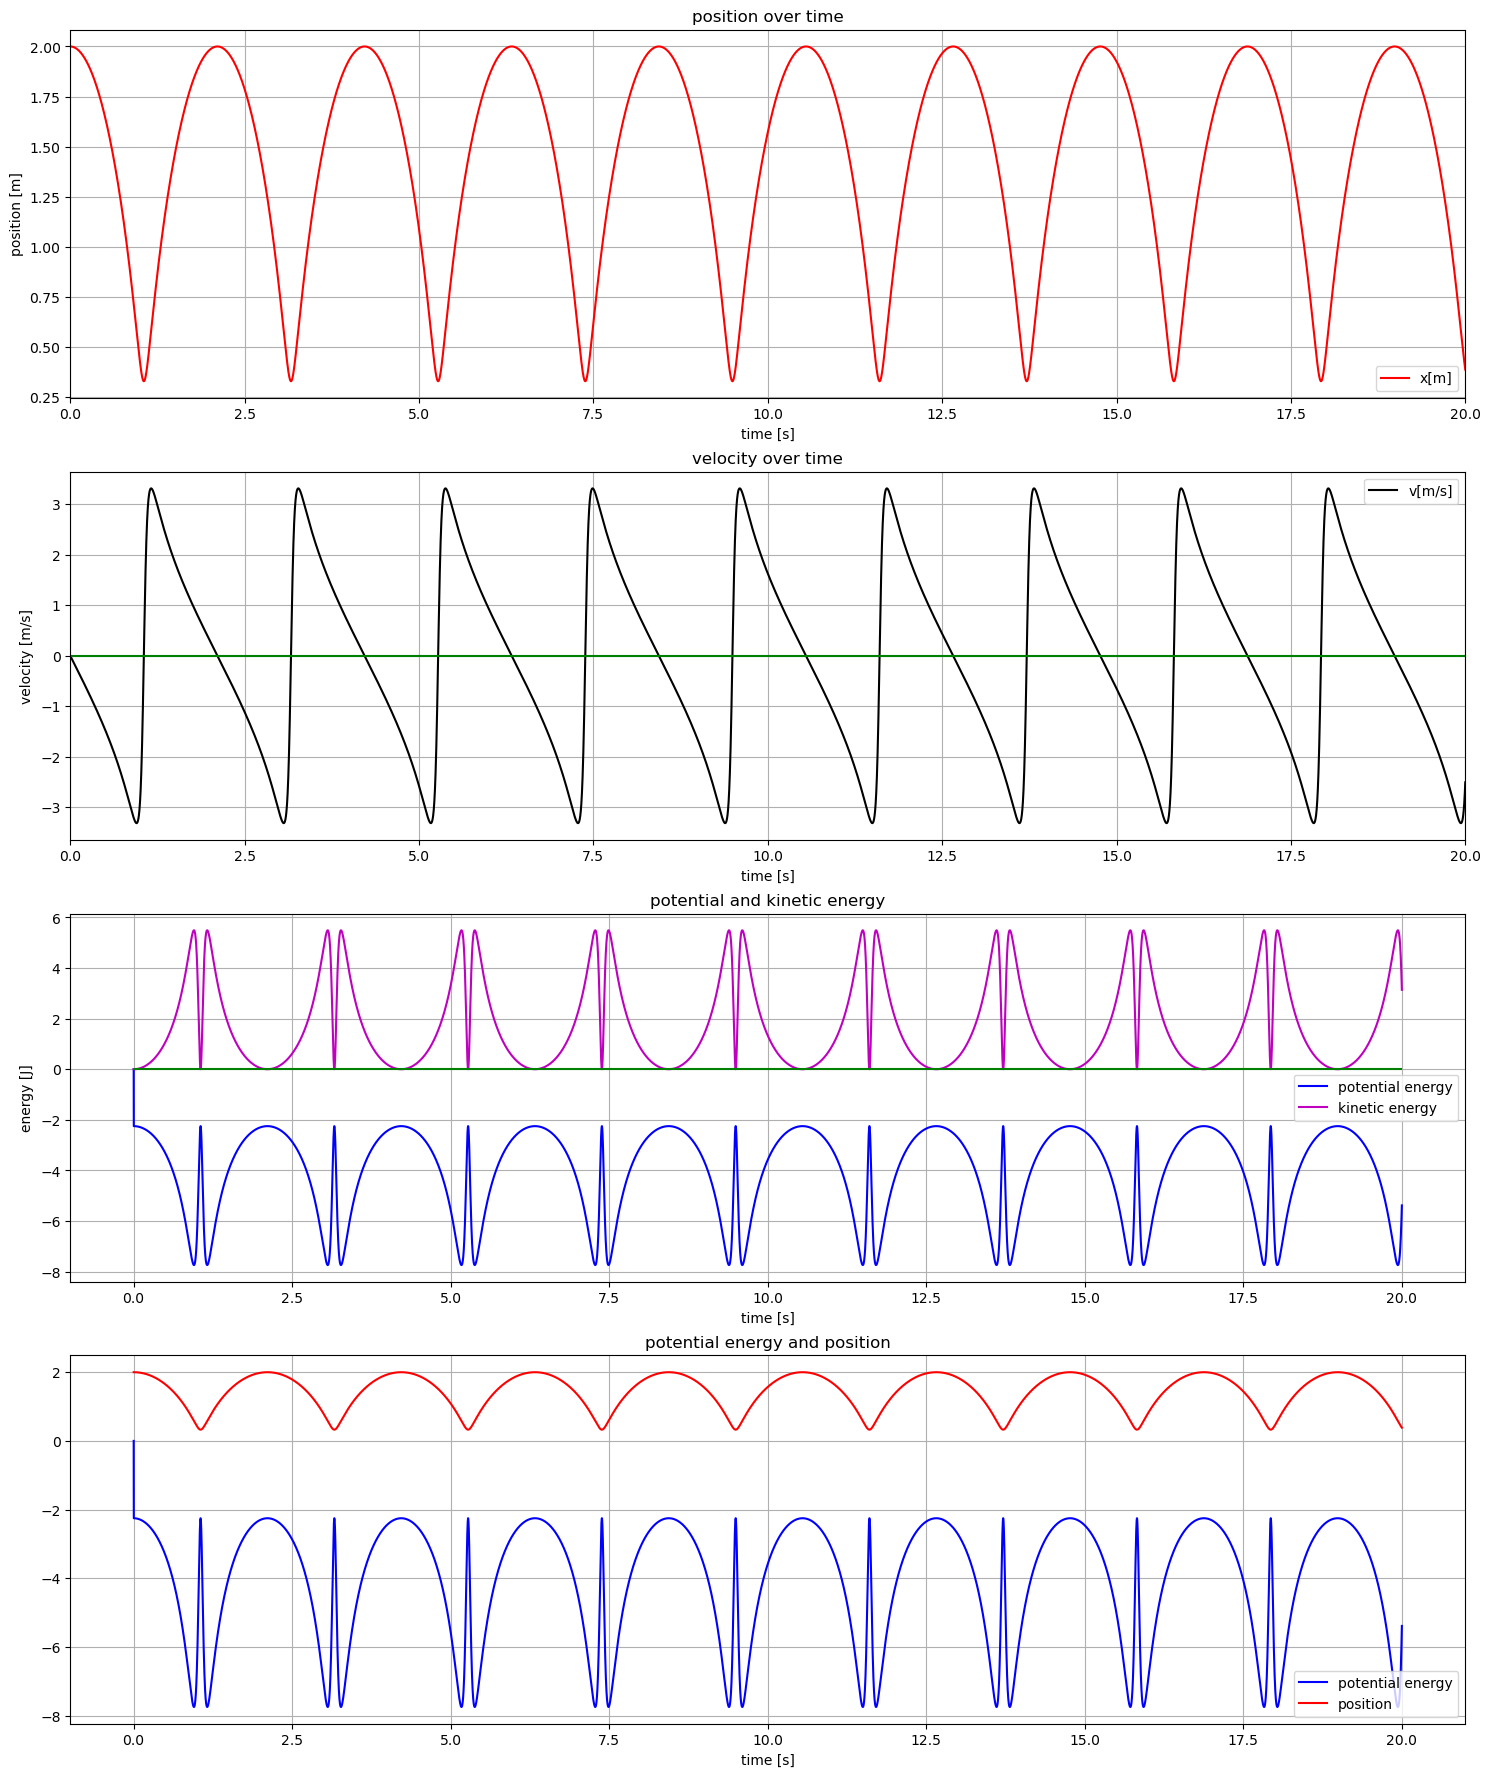

In [3]:
#Part 4
#Using the Euler-Cromer method in order to conserve energy of the system

#needed imports
import numpy as np
import pandas as pd
from math import *
import matplotlib.pyplot as plt

#initial conditions
gamma = 10
delta = 3
k = 1
DeltaT = 0.0001
xn = 10.0
x0 = 2
v0 = 0
m = 1

#setting up arrays 
tf = 20
n = int(np.ceil(tf/DeltaT))
t = np.zeros(n)
v = np.zeros(n)
x = np.zeros(n)
x[0] = x0
v[0] = v0

U = np.zeros(n)
K = np.zeros(n)

#integrating using Euler-Cromer's method
for i in range(n-1):
    a = -((gamma/x[i]**2) - (2*delta/x[i]**3) + k)/m
    
    #updating velocity, time and position arrays
    v[i+1] = v[i] + DeltaT*a
    x[i+1] = x[i] + DeltaT*(v[i+1]) 
    t[i+1] = t[i] + DeltaT
    
    U[i+1] = (-gamma/x[i+1]) + (delta/x[i+1]**2) + k*x[i+1]
    K[i+1] = (1/2)*m*(v[i+1])**2
    
#plotting position as function of time    
plt.figure(figsize=(18,22))
plt.subplot(4,1,1)
plt.plot(t, x, color = "red", label = 'x[m]')
plt.xlim([0,tf])
plt.title('position over time')
plt.xlabel('time [s]')
plt.ylabel('position [m]')
plt.grid()
plt.legend()

#plotting velocity as function of time    
plt.subplot(4,1,2)
plt.plot(t, v, color = 'black', label = 'v[m/s]')
plt.xlim([0,tf])
plt.title('velocity over time')
plt.xlabel('time [s]')
plt.ylabel('velocity [m/s]')
plt.hlines(0,0,20, color = 'green')
plt.grid()
plt.legend()

#plotting the kinetic and potential energies
plt.subplot(4,1,3)
plt.plot(t, U, color = 'blue', label = 'potential energy')
plt.subplot(4,1,3)
plt.plot(t, K, color = 'm', label = 'kinetic energy')
plt.hlines(0,0,20, color = 'green')
plt.title('potential and kinetic energy')
plt.xlabel('time [s]')
plt.ylabel('energy [J]')
plt.grid()
plt.legend()

#plotting the position of the potential
plt.subplot(4,1,4)
plt.plot(t, U, color = 'blue', label = 'potential energy')
plt.subplot(4,1,4)
plt.plot(t, x, color = 'red', label = 'position')
plt.title('potential energy and position')
plt.xlabel('time [s]')
plt.grid()
plt.legend()


<span style='color:Blue'> **Part 4**: The first two plots above show the position and the velocity as function of time. The third plot shows that energy is conserved as a function of time. Note how the kinetic and potential energies have equal but opposite shapes - this indicates that they do infact cancel each other out, and energy is conserved. The fourth and final plot is a comparison of the potential energy and the position with respect to time. Once they are plotted side-by-side, it is clear that the particle is in fact moving according to the constraints of the potential wells.